In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/assignment-1-data-csv/Assignment-1_Data.csv
/kaggle/input/transaction-data-csv/transaction_data.csv


# Market Basket Analysis Project

## Overview
This notebook is part of a project focused on market basket analysis. We will begin by loading and preprocessing the dataset.

## Dataset Information
The dataset is stored in the file `Assignment-1_Data.xlsx` located at `/kaggle/input/market-basket-analysis/`. It contains information related to market transactions.

## Loading the Dataset
Let's start by loading the dataset into a DataFrame using pandas.


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/kaggle/input/assignment-1-data-csv/Assignment-1_Data.csv", delimiter=';', decimal=',')
df

/tmp/ipykernel_32/3193742424.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/assignment-1-data-csv/Assignment-1_Data.csv", delimiter=';', decimal=',')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,4.15,12680.0,France


# **Initial Exploration**

We'll perform an initial exploration of the dataset to understand its structure and characteristics.

In [ ]:
# Display basic information about the dataset
print("Number of rows and columns:", df.shape)
print("\nData Types and Missing Values:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

Number of rows and columns: (522064, 7)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  float64
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 27.9+ MB
None

First few rows of the dataset:
   BillNo                             Itemname  Quantity              Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6  01.12.2010 08:26   
1  536365                  WHITE METAL LANTERN         6  01.12.2010 08:26   
2  536365       CREAM CUPID HEARTS COAT HANGER         8  01.12.2010 08:26   
3  536365  KNITTED UNION FLA

# Preprocessing

We'll preprocess the data to ensure it's ready for analysis.

In [ ]:
#Check Missing Values
print("Missing Values:")
print(df.isnull().sum())

#Drop Rows with Missing Values
df.dropna(inplace=True)


Missing Values:
BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64


In [ ]:
# Convert dataframe into transaction data
transaction_data = df.groupby(['BillNo', 'Date'])['Itemname'].apply(lambda x: ', '.join(x)).reset_index()

#Drop Unnecessary Columns
columns_to_drop = ['BillNo', 'Date']
transaction_data.drop(columns=columns_to_drop, inplace=True)

# Save the transaction data to a CSV file
transaction_data_path = '/kaggle/working/transaction_data.csv'
transaction_data.to_csv(transaction_data_path, index=False)

In [ ]:
# Display the first few rows of the transaction data
print("\nTransaction Data for Association Rule Mining:")
print(transaction_data.head())
transaction_data.shape


Transaction Data for Association Rule Mining:
                                            Itemname
0  WHITE HANGING HEART T-LIGHT HOLDER, WHITE META...
1  HAND WARMER UNION JACK, HAND WARMER RED POLKA DOT
2  ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHOU...
3  JAM MAKING SET WITH JARS, RED COAT RACK PARIS ...
4                           BATH BUILDING BLOCK WORD


(18194, 1)

# Phase 4 starts from here

## Formatting the transaction data in a suitable format for analysis

Developing the preprocessed data into analysis. Split the 'Itemname' column in `transaction_data` into individual items using `str.split(', ', expand=True)`.Concatenate the original DataFrame (`transaction_data`) with the items DataFrame (`items_df`) using `pd.concat`.Drop the original 'Itemname' column since individual items are now in separate columns.Display the resulting DataFrame.

In [ ]:
# Split the 'Itemname' column into individual items
items_df = transaction_data['Itemname'].str.split(', ', expand=True)

# Concatenate the original DataFrame with the new items DataFrame
transaction_data = pd.concat([transaction_data, items_df], axis=1)

# Drop the original 'Itemname' column
transaction_data = transaction_data.drop('Itemname', axis=1)

# Display the resulting DataFrame
print(transaction_data.head())

                                  0                            1    \
0  WHITE HANGING HEART T-LIGHT HOLDER          WHITE METAL LANTERN   
1              HAND WARMER UNION JACK    HAND WARMER RED POLKA DOT   
2       ASSORTED COLOUR BIRD ORNAMENT    POPPY'S PLAYHOUSE BEDROOM   
3            JAM MAKING SET WITH JARS  RED COAT RACK PARIS FASHION   
4            BATH BUILDING BLOCK WORD                         None   

                              2                                    3    \
0  CREAM CUPID HEARTS COAT HANGER  KNITTED UNION FLAG HOT WATER BOTTLE   
1                            None                                 None   
2       POPPY'S PLAYHOUSE KITCHEN    FELTCRAFT PRINCESS CHARLOTTE DOLL   
3  YELLOW COAT RACK PARIS FASHION         BLUE COAT RACK PARIS FASHION   
4                            None                                 None   

                              4                                   5    \
0  RED WOOLLY HOTTIE WHITE HEART.        SET 7 BABUSHKA NESTI

# Association Rules - Data Mining
## Converting Items to Boolean Columns

To prepare the data for association rule mining, we convert the items in the `transaction_data` DataFrame into boolean columns using one-hot encoding. This is achieved through the `pd.get_dummies` function, which creates a new DataFrame (`df_encoded`) with boolean columns representing the presence or absence of each item.

In [ ]:
# Convert items to boolean columns
df_encoded = pd.get_dummies(transaction_data, prefix='', prefix_sep='').groupby(level=0, axis=1).max()

# Save the transaction data to a CSV file
df_encoded.to_csv('transaction_data_encoded.csv', index=False)


## Association Rule Mining
We apply the Apriori algorithm to perform association rule mining on the encoded transaction data. The `min_support` parameter is set to 0.007 to filter out infrequent itemsets. The resulting frequent itemsets are then used to generate association rules based on a minimum confidence threshold of 0.5.Finally, we print the generated association rules.

In [ ]:
# Load transaction data into a DataFrame
import pandas as pd
df_encoded = pd.read_csv('transaction_data_encoded.csv')

from mlxtend.frequent_patterns import apriori, association_rules

# Association Rule Mining
frequent_itemsets = apriori(df_encoded, min_support=0.007, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display information of the rules
print("Association Rules:")
print(rules.head())

Association Rules:
                         antecedents                        consequents  \
0            (CHOCOLATE BOX RIBBONS)           (6 RIBBONS RUSTIC CHARM)   
1  (60 CAKE CASES DOLLY GIRL DESIGN)  (PACK OF 72 RETROSPOT CAKE CASES)   
2      (60 TEATIME FAIRY CAKE CASES)  (PACK OF 72 RETROSPOT CAKE CASES)   
3   (ALARM CLOCK BAKELIKE CHOCOLATE)       (ALARM CLOCK BAKELIKE GREEN)   
4   (ALARM CLOCK BAKELIKE CHOCOLATE)        (ALARM CLOCK BAKELIKE PINK)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.012367            0.039189  0.007035    0.568889  14.516640   
1            0.018523            0.054523  0.010058    0.543027   9.959504   
2            0.034627            0.054523  0.017313    0.500000   9.170363   
3            0.017149            0.042926  0.011377    0.663462  15.455850   
4            0.017149            0.032648  0.009124    0.532051  16.296534   

   leverage  conviction  zhangs_metric  
0  0.006551    2.228

# Visualization

## Visualizing Market Basket Analysis Results

We use matplotlib and seaborn libraries to create a scatterplot visualizing the results of the market basket analysis. The plot depicts the relationship between support, confidence, and lift for the generated association rules.


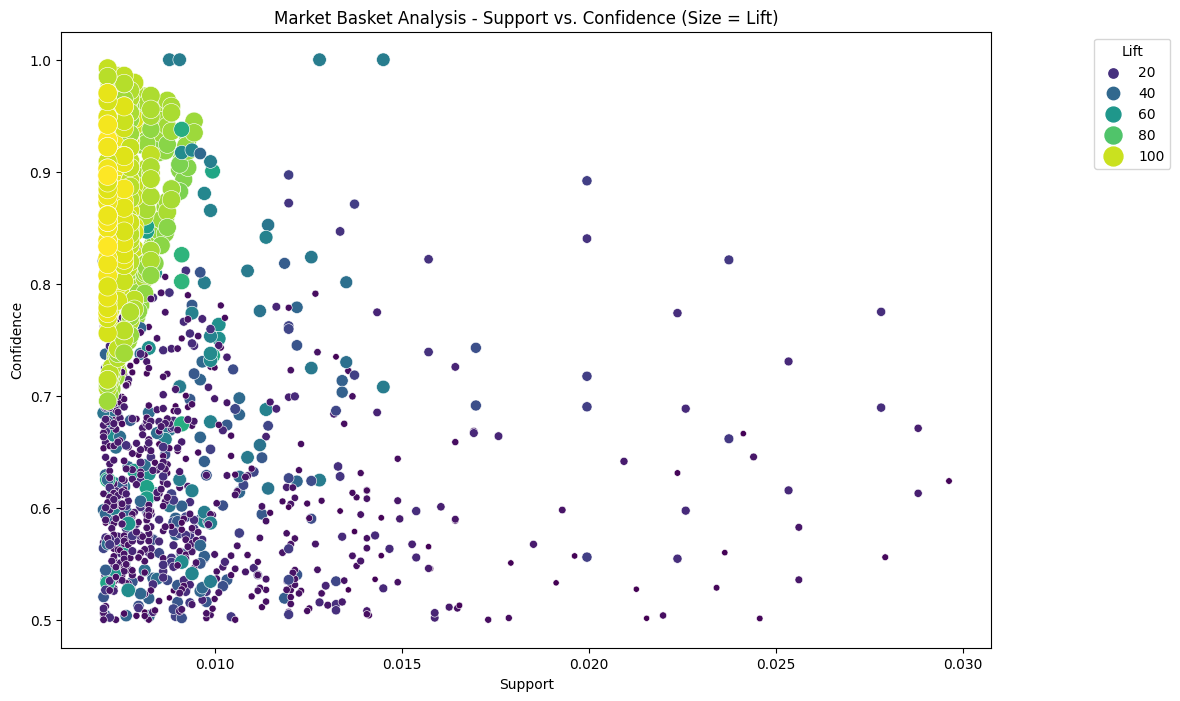

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatterplot for Support vs. Confidence
plt.figure(figsize=(12, 8))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, hue="lift", palette="viridis", sizes=(20, 200))
plt.title('Market Basket Analysis - Support vs. Confidence (Size = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()



NANDHA COLLEGE OF TECHNOLOGY

26.10.2023

